In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import random as rd

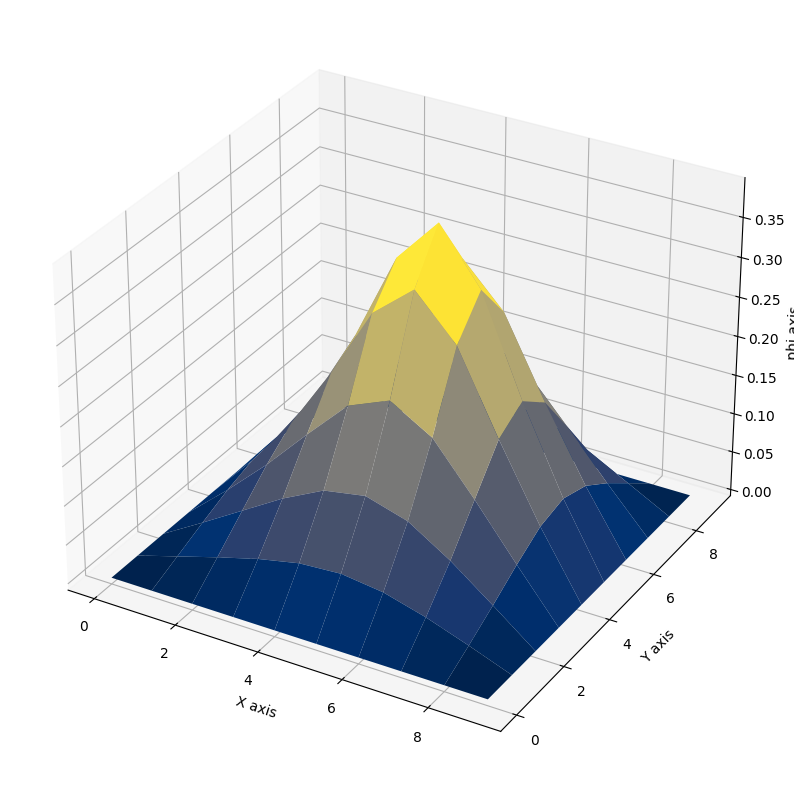

In [5]:
#syarat awal
jumlah_x = 10
jumlah_y = 10
total_titik = jumlah_x*jumlah_y
delta_x = 0.5
delta_y = 0.5
jumlah_iterasi = 10000
epsilon_nol = 1

temp = np.zeros((jumlah_y,jumlah_x))
phi = np.zeros((jumlah_y,jumlah_x))
data_rho = np.zeros((jumlah_y,jumlah_x))

#distribusi gauss 2 dimensi
x_0 = 5 # nilai titik
y_0 = 5 # pusat

var_x = 1 # nilai varian
var_y = 1

for m in range(jumlah_y):
    for n in range(jumlah_x):
        gauss_2d = np.exp(-(((n-x_0)**2/(2*var_x))+((m-y_0)**2)/(2*var_y)))
        data_rho[m,n] = (gauss_2d)
        
np.savetxt('rho_dua_dimensi_cartesian.csv', data_rho, fmt = '%.11f', delimiter=',') #penyimpanan rho

# perhitungan phi gauss seidel
for k in range (jumlah_iterasi):
    for j in range (1, jumlah_y-1):
        for i in range (1, jumlah_x-1):
            phi[j,i] = ((((temp[j, i+1]+temp[j, i-1])/delta_x**2)+((temp[j+1, i]+temp[j-1, i])/delta_y**2)+(data_rho[j,i]/epsilon_nol))/2)*(delta_x**2 * delta_y**2)/(delta_y**2 + delta_x**2)
            temp[j,i] = phi[j,i]

np.savetxt('phi_dua_dimensi_cartesian.csv', phi, fmt = '%.15f', delimiter=',') #penyimpanan hasil phi

#plotting 
df = pd.read_csv('phi_dua_dimensi_cartesian.csv', header = None)

x = df.columns
y = df.index

X,Y = np.meshgrid(x,y)
Z = df.values

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('phi axis')

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Distribusi rho dua dimensi kartesian

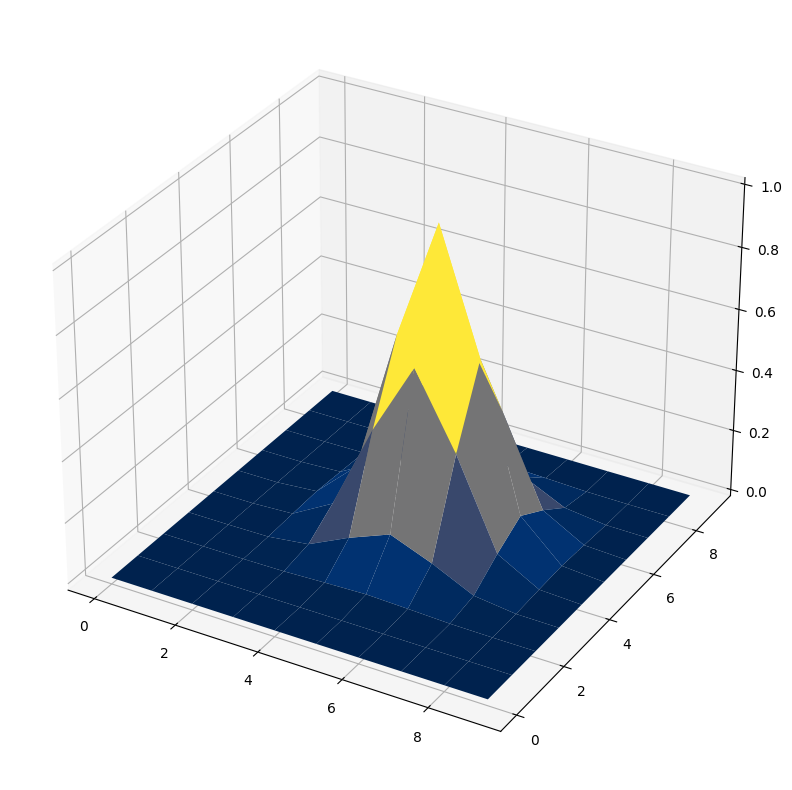

In [6]:
df = pd.read_csv('rho_dua_dimensi_cartesian.csv', header=None)

q = df.columns
r = df.index

Q,R = np.meshgrid(q,r)

S = df.values

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(R, Q, S, cmap = plt.cm.cividis)

In [8]:
data_rho.shape

(10, 10)

In [10]:
phi.shape

(10, 10)